# SYD DAT 6 

## Homework - Due Monday 28th November 2016

#### Course Project homework
Share with a me a Jupyter notebook containing the following:
* Data read into python in a data frame
* A statistical summary of your data
* A visualisation of your data
* One of the following with your data; Linear or Logistic Regression (with regularization), or Clustering.
* A written summary at the end describing your data

#### Bonus
Pick one data science topic that interests you, could be an article, or how a Kaggle competition was won, or an article incorporating data journalism. Write a short blog post (2 pages) with some visualisations where you discuss what was interesting.

**Instructions: share the notebook and any other docuements with your name on the file e.g. _alasdaird.ipynb.
Then commit this in your local repository, push it to your github account and create a pull request so I can see your work. Remeber if you get stuck to look at the slides going over Fork, Clone, Commit, Push and Pull request.**

In [49]:
import pandas as pd
import pip
import nltk
import re
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [14]:
songlist = pd.read_csv('allsongs_lyrkl_alister.csv', header=0)

In [15]:
#Summary of Data
songlist.describe()

,Unnamed: 0,rank,word_counts,unique_word_counts,lyrkl_score,Year
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,49.500000,50.500000,396.344000,135.838000,49.569520,2013.00000
std,28.894979,28.894979,147.924403,61.037586,30.421820,1.41563
min,0.000000,1.000000,8.000000,4.000000,1.028571,2011.00000
25%,24.750000,25.750000,305.000000,97.000000,27.617486,2012.00000
50%,49.500000,50.500000,376.500000,121.500000,41.984835,2013.00000
75%,74.250000,75.250000,461.250000,160.250000,61.457229,2014.00000
max,99.000000,100.000000,952.000000,409.000000,211.480405,2015.00000


In [46]:
wc = pd.DataFrame(songlist.word_counts, songlist.unique_word_counts)

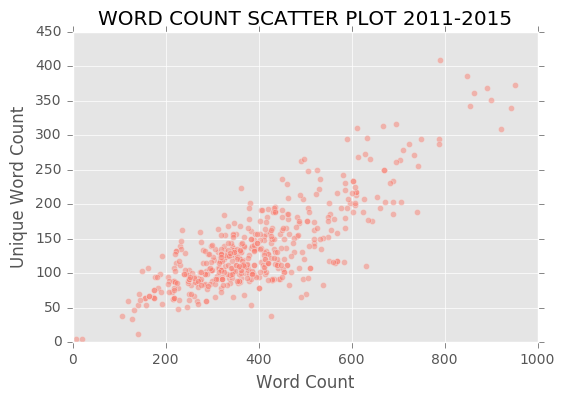

In [35]:
#Visualisation of Data
colors = np.array(['#FF0054','#FBD039','#23C2BC'])
songlist.plot(kind='scatter', x='word_counts', y='unique_word_counts', alpha=0.5, c='salmon')
plt.suptitle("")
plt.title('WORD COUNT SCATTER PLOT 2011-2015')
plt.xlabel('Word Count')
plt.ylabel('Unique Word Count')
plt.ylim([0,450])
plt.xlim([0,1000])
plt.show() 
plt.savefig('WORD COUNT SCATTER PLOT 2011-2015.png')

In [53]:
lm = smf.ols(formula='rank ~ word_counts + unique_word_counts + lyrkl_score', data=songlist).fit()

In [54]:
lm.params

Intercept             51.970791
word_counts           -0.025728
unique_word_counts     0.048604
lyrkl_score            0.042852
dtype: float64

In [55]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.640
Date:                Wed, 14 Dec 2016   Prob (F-statistic):              0.179
Time:                        14:08:50   Log-Likelihood:                -2388.3
No. Observations:                 500   AIC:                             4785.
Df Residuals:                     496   BIC:                             4802.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             51.9708      3.735     13.914      0.000        44.632    59.310
word_counts           -0.0257      0.037     -0.688      0.492        -0.099     0.048
unique_word_counts     0.0486      0.204      0.239      0.811        -0.351     0.448
lyrkl_score            0.0429      0.286      0.150      0.881        -0.519     0.605
==============================================================================
Omnibus:                      262.688   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.655
Skew:                          -0.006   Prob(JB):                     5.99e-07
Kurtosis:                       1.827   Cond. No.                     1.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
lm = smf.ols(formula='rank ~ lyrkl_score', data=songlist).fit()

In [57]:
lm.params

Intercept      47.366362
lyrkl_score     0.063217
dtype: float64

In [58]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.216
Date:                Wed, 14 Dec 2016   Prob (F-statistic):              0.137
Time:                        14:09:48   Log-Likelihood:                -2389.7
No. Observations:                 500   AIC:                             4783.
Df Residuals:                     498   BIC:                             4792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      47.3664      2.469     19.182      0.000        42.515    52.218
lyrkl_score     0.0632      0.042      1.489      0.137        -0.020     0.147
==============================================================================
Omnibus:                      299.847   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.618
Skew:                          -0.000   Prob(JB):                     3.70e-07
Kurtosis:                       1.808   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Describing the Data

The data shows that a large portion of the word count is between 200-500 total words per song. Looking at the feautres in linear regression, there does not appear to be any correlation for rank and the other features.